# Case Study 4. Incomes

An advertising agency collected data on the income (\$000's) of 152
individual families in its area of operations. It was interested in the
mean and median family income. The variable measured was:

\begin{align*}
\textbf{incomes} &\quad\quad \textrm{the income of each family (in \$000's)}
\end{align*}

In [1]:
install.packages("s20x")
library(s20x)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)

Installing package into '/home/nbuser/R'
(as 'lib' is unspecified)


In [2]:
data(incomes.df)
head(incomes.df)

incomes
18
25
51
27
38
37


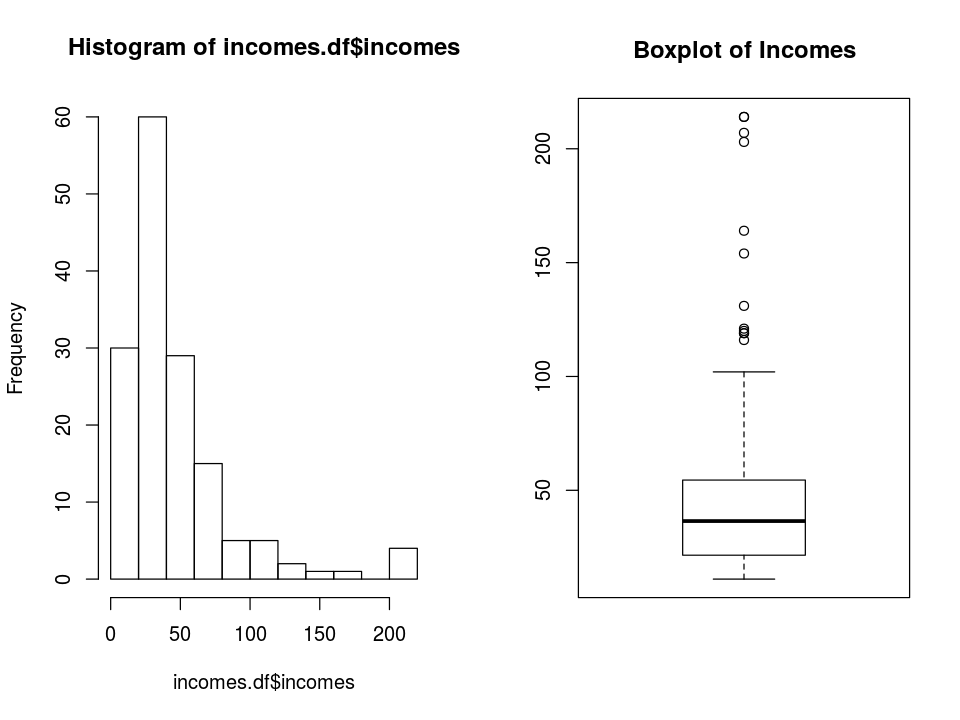

In [3]:
layout20x(1, 2)
hist(incomes.df$incomes)
boxplot(incomes.df$incomes, main = "Boxplot of Incomes")

In [4]:
summaryStats(incomes.df$incomes)

Minimum value:           11 
Maximum value:           214 
Mean value:              47.56 
Median:                  36.5 
Upper quartile:          54.25 
Lower quartile:          21.75 
Variance:                1538.45 
Standard deviation:      39.22 
Midspread (IQR):         32.5 
Skewness:                2.37 
Number of data values:   152 


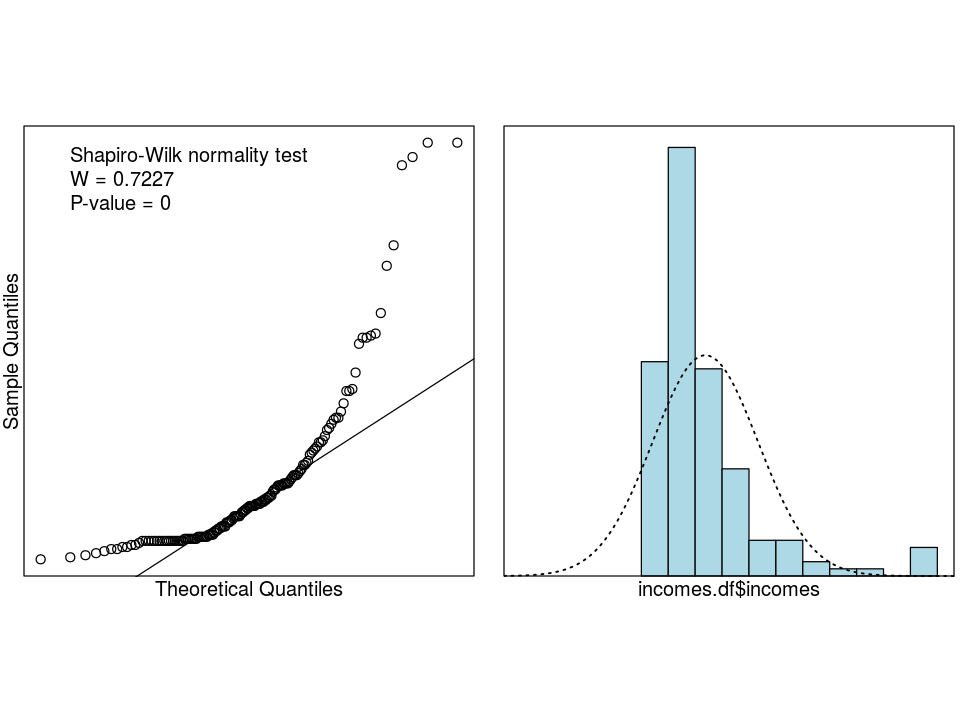

In [5]:
normcheck(incomes.df$incomes, shapiro.wilk = TRUE)

In [8]:
trans.incomes = log(incomes.df$incomes)
summaryStats(trans.incomes)

Minimum value:           2.4 
Maximum value:           5.37 
Mean value:              3.63 
Median:                  3.6 
Upper quartile:          3.99 
Lower quartile:          3.08 
Variance:                0.41 
Standard deviation:      0.64 
Midspread (IQR):         0.91 
Skewness:                0.65 
Number of data values:   152 


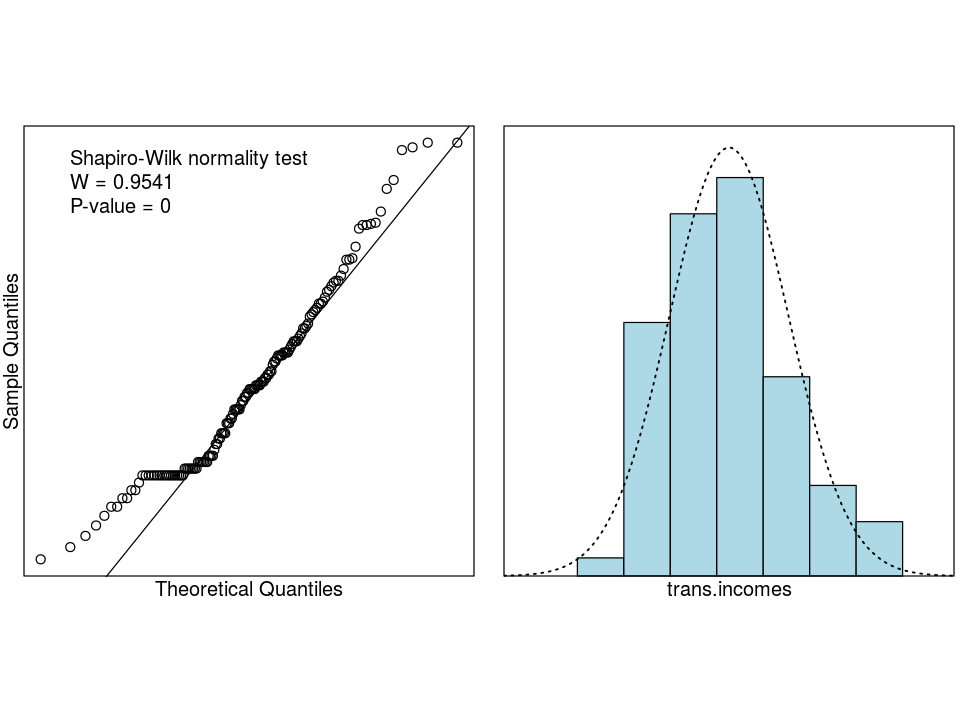

In [9]:
normcheck(trans.incomes, shapiro.wilk = TRUE)

In [11]:
#t.test(incomes.df$incomes)
t.test(trans.incomes)


	One Sample t-test

data:  trans.incomes
t = 69.892, df = 151, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3.528905 3.734228
sample estimates:
mean of x 
 3.631567 


In [12]:
c.i. = t.test(trans.incomes)$conf.int
c.i.
exp(c.i.)

[1] 3.528905 3.734228
attr(,"conf.level")
[1] 0.95

[1] 34.08663 41.85571
attr(,"conf.level")
[1] 0.95

## Methods and Assumption Checks

We are attempting to estimate the mean (and median) of one group of
observations, so we do a one-sample $t$-test.

The families are assumed to be independent of one another. The Normality
assumption is not satisfied, as the data is clearly right-skewed. A
log-transformation of incomes made the data look more symmetrical but
the Q-Q plot still shows the logged data is still not Normally
distributed, but we can use the Central Limit Theorem to justify the
Normality assumption and hence estimate both the mean and median (using
the logged data).

The first model fitted is ${\tt incomes}_i = \mu + \varepsilon_i$,
where $\mu$ is the mean interarrival time and
$\varepsilon_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$. The second model (for the median)
is $\log({\tt incomes}_i) = \nu + \varepsilon_i$, where $\mu$ is the
mean income, $\nu$ is the mean logged income and
$\varepsilon_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$ for both models.

## Executive Summary

Our interest in these data was to estimate the mean and median income of
families in an advertising agency's area of operations.

We estimate that the mean family income is between \$41,300 and
\$53,800, and that the median family income is between \$34,100 and
\$41,800.
